# Cali Fire 
using SQL database: https://www.kaggle.com/datasets/rtatman/188-million-us-wildfires?datasetId=2478&sortBy=dateRun&select=FPA_FOD_20170508.sqlite

### Load data from DB

In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [12]:
# Creating a western US DataFrame from the database
conn = sqlite3.connect('../../data/SQL/FPA_FOD_20170508.sqlite')
query = '''select * 
           from fires
           where STATE in ('CA', 'WA', 'OR')'''
df = pd.read_sql_query(query, conn)

In [13]:
df.shape

(284151, 39)

In [14]:
df.head()

,OBJECTID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,...,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,Shape
0,1,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,...,A,40.036944,-121.005833,5.0,USFS,CA,63,063,Plumas,b'\x00\x01\xad\x10\x00\x00\xe8d\xc2\x92_@^\xc0...
1,2,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.933056,-120.404444,5.0,USFS,CA,61,061,Placer,b'\x00\x01\xad\x10\x00\x00T\xb6\xeej\xe2\x19^\...
2,3,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17,017,El Dorado,b'\x00\x01\xad\x10\x00\x00\xd0\xa5\xa0W\x13/^\...
3,4,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.913333,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00\x94\xac\xa3\rt\xfa]...
4,5,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,...,A,38.559167,-119.933056,5.0,USFS,CA,3,003,Alpine,b'\x00\x01\xad\x10\x00\x00@\xe3\xaa.\xb7\xfb]\...


### EDA

In [15]:
df.describe()

,OBJECTID,FOD_ID,FIRE_YEAR,DISCOVERY_DATE,DISCOVERY_DOY,STAT_CAUSE_CODE,CONT_DATE,CONT_DOY,FIRE_SIZE,LATITUDE,LONGITUDE,OWNER_CODE
count,2.841510e+05,2.841510e+05,284151.000000,2.841510e+05,284151.000000,284151.000000,1.740220e+05,174022.000000,284151.000000,284151.000000,284151.000000,284151.000000
mean,8.576252e+05,5.370491e+07,2003.161224,2.452903e+06,204.927261,5.074524,2.453232e+06,208.976440,91.292581,40.012270,-120.414009,9.185419
std,5.970932e+05,1.041450e+08,7.020874,2.560461e+03,59.926024,3.651245,2.587901e+03,56.472801,2781.685401,4.375595,2.123650,4.589060
min,1.000000e+00,1.000000e+00,1992.000000,2.448622e+06,1.000000,1.000000,2.448622e+06,1.000000,0.001000,32.537406,-124.718610,0.000000
25%,2.322625e+05,2.363595e+05,1997.000000,2.450650e+06,174.000000,2.000000,2.451060e+06,182.000000,0.100000,36.831944,-122.040454,5.000000
50%,1.074099e+06,1.309747e+06,2003.000000,2.452858e+06,208.000000,4.000000,2.453212e+06,212.000000,0.200000,39.473056,-120.718889,8.000000
75%,1.145136e+06,1.395428e+06,2009.000000,2.455042e+06,242.000000,9.000000,2.455436e+06,243.000000,1.000000,43.585833,-118.809400,14.000000
max,1.880465e+06,3.003484e+08,2015.000000,2.457388e+06,366.000000,13.000000,2.457388e+06,366.000000,558198.300000,49.001130,-114.125800,15.000000


In [16]:
df.dtypes

OBJECTID                        int64
FOD_ID                          int64
FPA_ID                         object
SOURCE_SYSTEM_TYPE             object
SOURCE_SYSTEM                  object
NWCG_REPORTING_AGENCY          object
NWCG_REPORTING_UNIT_ID         object
NWCG_REPORTING_UNIT_NAME       object
SOURCE_REPORTING_UNIT          object
SOURCE_REPORTING_UNIT_NAME     object
LOCAL_FIRE_REPORT_ID           object
LOCAL_INCIDENT_ID              object
FIRE_CODE                      object
FIRE_NAME                      object
ICS_209_INCIDENT_NUMBER        object
ICS_209_NAME                   object
MTBS_ID                        object
MTBS_FIRE_NAME                 object
COMPLEX_NAME                   object
FIRE_YEAR                       int64
DISCOVERY_DATE                float64
DISCOVERY_DOY                   int64
DISCOVERY_TIME                 object
STAT_CAUSE_CODE               float64
STAT_CAUSE_DESCR               object
CONT_DATE                     float64
CONT_DOY    

In [19]:
df.isna().sum()

OBJECTID                           0
FOD_ID                             0
FPA_ID                             0
SOURCE_SYSTEM_TYPE                 0
SOURCE_SYSTEM                      0
NWCG_REPORTING_AGENCY              0
NWCG_REPORTING_UNIT_ID             0
NWCG_REPORTING_UNIT_NAME           0
SOURCE_REPORTING_UNIT              0
SOURCE_REPORTING_UNIT_NAME         0
LOCAL_FIRE_REPORT_ID          158780
LOCAL_INCIDENT_ID             116567
FIRE_CODE                     188376
FIRE_NAME                      31604
ICS_209_INCIDENT_NUMBER       279317
ICS_209_NAME                  279317
MTBS_ID                       282001
MTBS_FIRE_NAME                282001
COMPLEX_NAME                  282154
FIRE_YEAR                          0
DISCOVERY_DATE                     0
DISCOVERY_DOY                      0
DISCOVERY_TIME                110105
STAT_CAUSE_CODE                    0
STAT_CAUSE_DESCR                   0
CONT_DATE                     110129
CONT_DOY                      110129
C

In [22]:
#show missing values by %
percent_missing = round(df.isnull().sum() * 100 / len(df))
missing_values = pd.DataFrame({'percent_missing': percent_missing})
missing_values

,percent_missing
OBJECTID,0.0
FOD_ID,0.0
FPA_ID,0.0
SOURCE_SYSTEM_TYPE,0.0
SOURCE_SYSTEM,0.0
NWCG_REPORTING_AGENCY,0.0
NWCG_REPORTING_UNIT_ID,0.0
NWCG_REPORTING_UNIT_NAME,0.0
SOURCE_REPORTING_UNIT,0.0
SOURCE_REPORTING_UNIT_NAME,0.0


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid") 

Text(0, 0.5, 'Count')

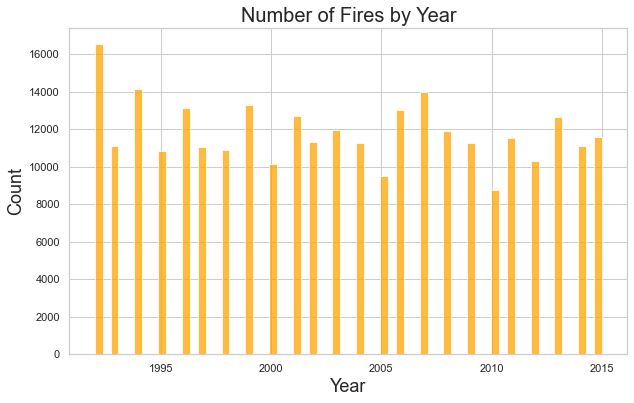

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="FIRE_YEAR", color = 'orange')
plt.title('Number of Fires by Year', size=20)
plt.xlabel('Year', size=18)
plt.ylabel('Count', size=18)

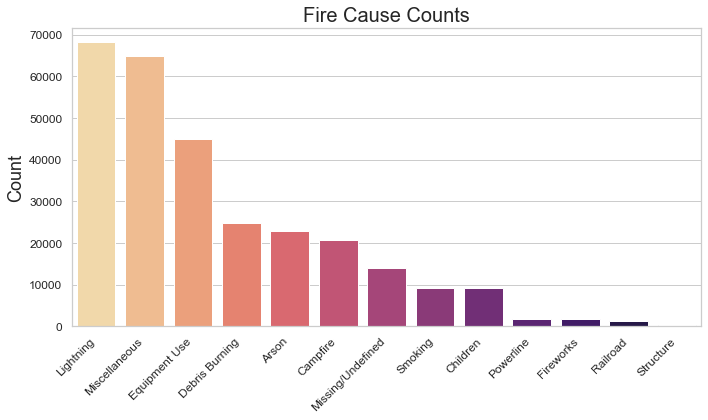

In [27]:
# Bar plot for class imbalance

cause_counts_full = pd.DataFrame(df['STAT_CAUSE_DESCR'].value_counts().reset_index(drop=False))

plt.figure(figsize=(10,6))
sns.barplot(x='index', y='STAT_CAUSE_DESCR', data=cause_counts_full, palette='magma_r')
plt.title('Fire Cause Counts', size=20)
plt.xlabel('')
plt.xticks(rotation=45, size=12, horizontalalignment='right')
plt.ylabel('Count', size=18)
plt.yticks(size=12)
plt.tight_layout()
# plt.savefig./Figures/FireCausesCounts.pngpng', dpi=300)
plt.show()

## Feature Cleaning for further EDA
### Convert discovery date to datetime format and create day, month, day of week features from it

In [33]:
# Converting from Julian dates to Gregorian
epoch = pd.to_datetime(0, unit='s').to_julian_date()
df['DISC_GREG_DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - epoch, unit='D')

epoch = pd.to_datetime(0, unit='s').to_julian_date()
df['CONT_GREG_DATE'] = pd.to_datetime(df['CONT_DATE'] - epoch, unit='D')

# Creating a discovery month feature
df['DISC_MONTH'] = df['DISC_GREG_DATE'].dt.month

In [34]:
# Creating a discovery day feature
df['DISC_DAY'] = df['DISC_GREG_DATE'].dt.day
# Creating a discovery day of week feature
df['DISC_DAYOFWEEK'] = df['DISC_GREG_DATE'].dt.dayofweek

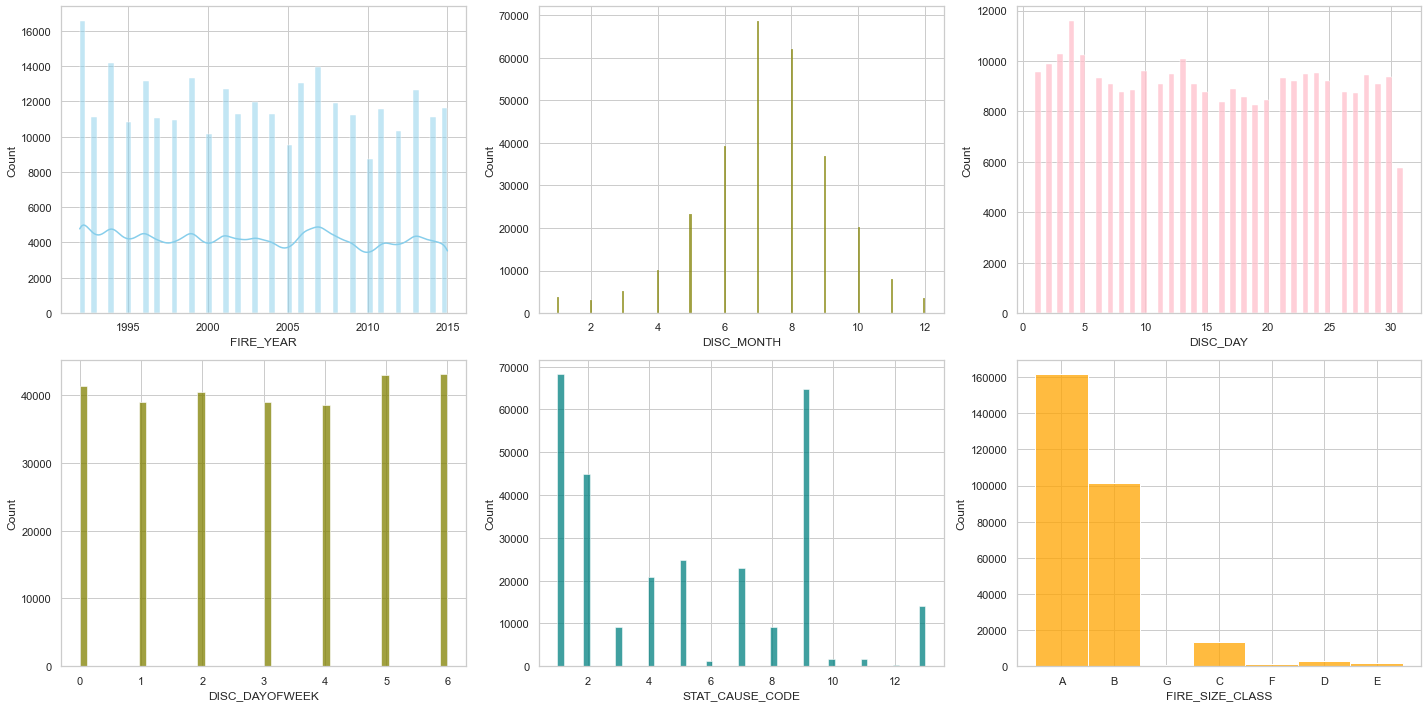

In [36]:
fig,axs = plt.subplots(2,3, figsize = (20,10))

sns.histplot(data=df, x="FIRE_YEAR", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df, x="DISC_MONTH", color="olive", ax=axs[0, 1])
sns.histplot(data=df, x="DISC_DAY", color="pink", ax=axs[0, 2])

sns.histplot(data=df, x="DISC_DAYOFWEEK", color="olive", ax=axs[1, 0])
sns.histplot(data=df, x="STAT_CAUSE_DESCR", color="teal", ax=axs[1, 1])
sns.histplot(data=df, x="FIRE_SIZE_CLASS", color="orange", ax=axs[1,2])

fig.tight_layout()

C:\Users\3_hal\AppData\Local\Temp\ipykernel_14092\858673589.py:9: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()
C:\Users\3_hal\anaconda3\envs\lighthouse_env\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


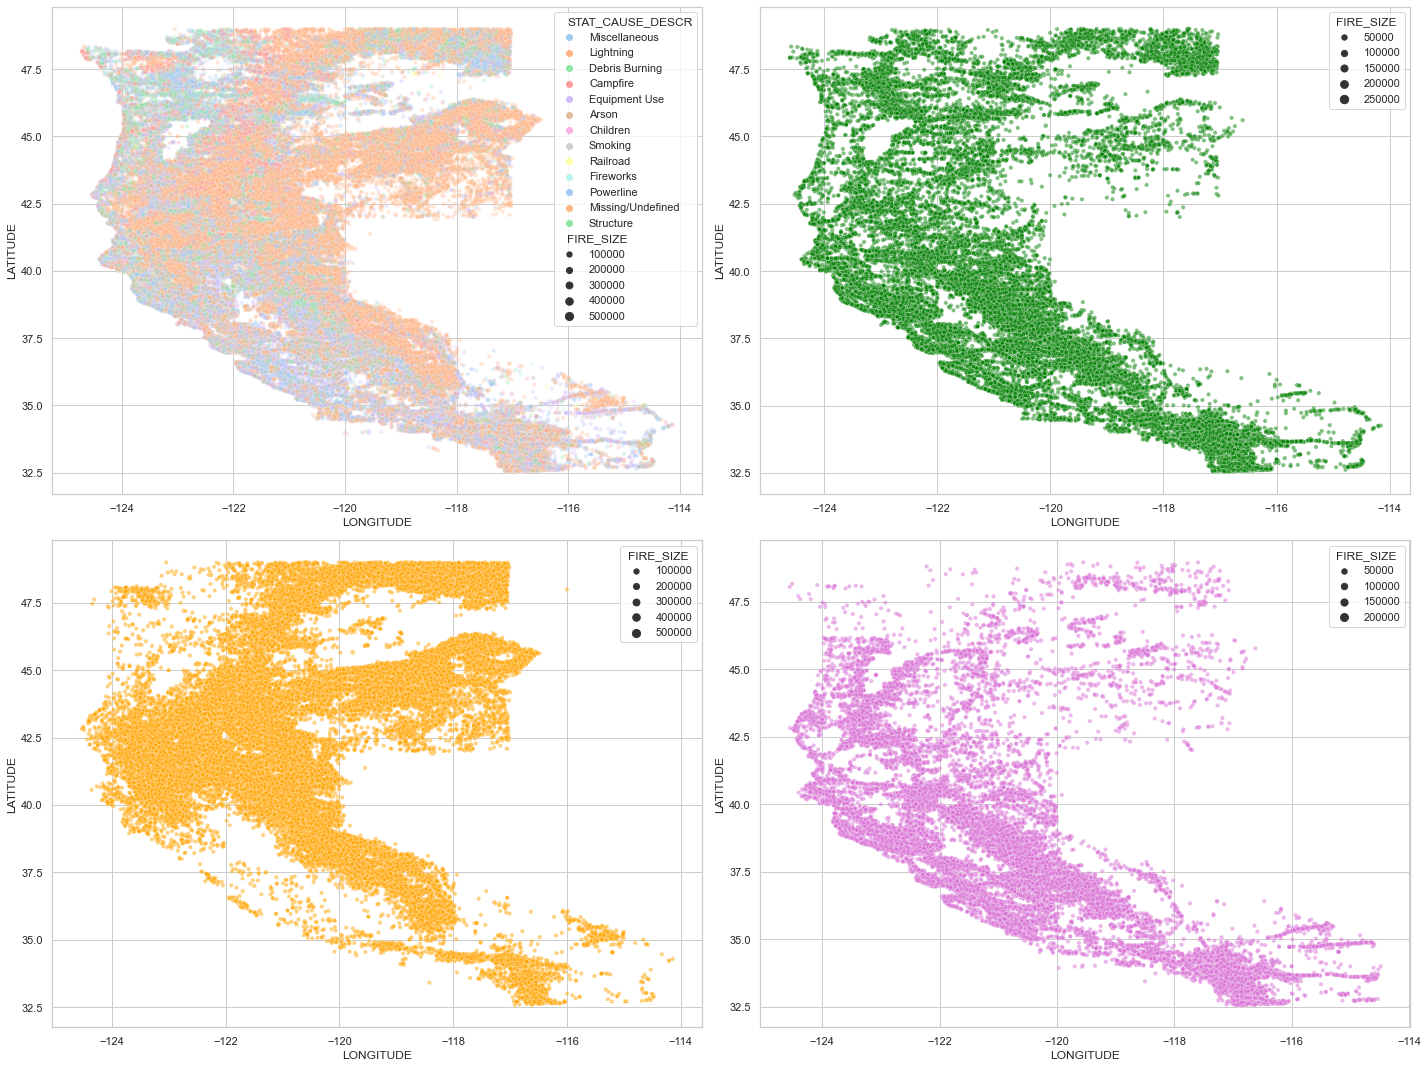

In [38]:
fig,axs = plt.subplots(2,2,figsize = (20,15))

sns.scatterplot(data=df, x="LONGITUDE", y="LATITUDE", hue="STAT_CAUSE_DESCR", alpha=.3, palette = 'pastel', size="FIRE_SIZE", ax=axs[0, 0])  
sns.scatterplot(data=df[df['STAT_CAUSE_DESCR']=='Miscellaneous'], x="LONGITUDE", y="LATITUDE", color = 'green' , alpha=.5, size="FIRE_SIZE", ax=axs[0, 1])

sns.scatterplot(data=df[df['STAT_CAUSE_DESCR']=='Lightning'], x="LONGITUDE", y="LATITUDE", color = 'orange', alpha=.5, size="FIRE_SIZE", ax=axs[1, 0])
sns.scatterplot(data=df[df['STAT_CAUSE_DESCR']=='Equipment Use'], x="LONGITUDE", y="LATITUDE", color = 'orchid', alpha=.5, size="FIRE_SIZE", ax=axs[1,1])
     
fig.tight_layout()

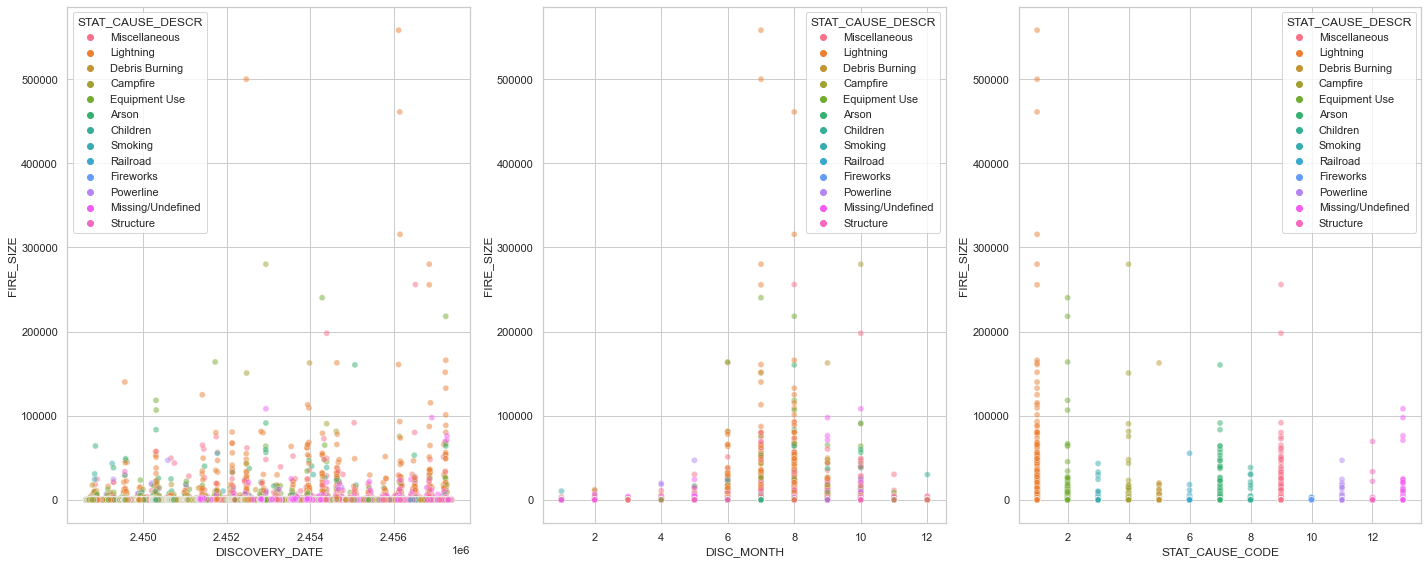

In [40]:
fig,axs = plt.subplots(1,3, figsize = (20,8))
sns.scatterplot(data=df, x="DISCOVERY_DATE", y="FIRE_SIZE", hue="STAT_CAUSE_DESCR",alpha=.5, ax=axs[0])                     
sns.scatterplot(data=df, x="DISC_MONTH", y="FIRE_SIZE", hue="STAT_CAUSE_DESCR", alpha=.5, ax=axs[1])          
sns.scatterplot(data=df, x="STAT_CAUSE_CODE", y="FIRE_SIZE", hue="STAT_CAUSE_DESCR", alpha=.5, ax=axs[2])        
fig.tight_layout()

In [ ]:
# Yearly time series of causes of fire in the US

# Empty DataFrame to fill iteratively
MW_fire_causes = pd.DataFrame({
    'Year': years,
    'Miscellaneous': np.zeros(24),
    'Missing/Undefined': np.zeros(24),
    'Lightning': np.zeros(24),
    'Debris Burning': np.zeros(24),
    'Arson': np.zeros(24),
    'Equipment Use': np.zeros(24),
    'Campfire': np.zeros(24),
    'Smoking': np.zeros(24),
    'Children': np.zeros(24),
    'Powerline': np.zeros(24),
    'Fireworks': np.zeros(24),
    'Railroad': np.zeros(24),
    'Structure': np.zeros(24),
})

# Iterating through years and causes, saving the number of fire causes per year to DataFrame
idx = 0
for yr in years:
    for cause in fire_causes:
        cause_value_count = df[(df['FIRE_YEAR'] == yr) & (df['STAT_CAUSE_DESCR'] == cause)].shape[0]
        MW_fire_causes.loc[idx, cause] = cause_value_count
    idx += 1

# Plotting time-series line plots for causes
plt.figure(figsize=(10,6))

for cause in fire_causes:
    sns.lineplot(data=MW_fire_causes, x='Year', y=cause)

plt.title('Trends of Fire Causes', size=20)
plt.legend(fire_causes, loc=2, fontsize=12)
plt.ylabel('Total Fires by Cause', size=18)
plt.yticks(size=14)
plt.xlabel('Year', size=18)
plt.xticks(size=14)
plt.savefig('./Figures/FireCausesPerYear.png', dpi=300)
plt.show()

In [ ]:
# Monthly time series of causes of fire in the US

months = [x for x in range(1,13)]

# Empty DataFrame to fill iteratively
MW_fire_causes_months = pd.DataFrame({
    'Month': months,
    'Miscellaneous': np.zeros(12),
    'Missing/Undefined': np.zeros(12),
    'Lightning': np.zeros(12),
    'Debris Burning': np.zeros(12),
    'Arson': np.zeros(12),
    'Equipment Use': np.zeros(12),
    'Campfire': np.zeros(12),
    'Smoking': np.zeros(12),
    'Children': np.zeros(12),
    'Powerline': np.zeros(12),
    'Fireworks': np.zeros(12),
    'Railroad': np.zeros(12),
    'Structure': np.zeros(12),
})

# Iterating through months and causes, saving the number of fire causes per year to DataFrame
idx = 0
for mn in months:
    for cause in fire_causes:
        cause_value_count = df[(df['DISC_MONTH'] == mn) & (df['STAT_CAUSE_DESCR'] == cause)].shape[0]
        MW_fire_causes_months.loc[idx, cause] = cause_value_count
    idx += 1

# Plotting time-series line plots for causes
plt.figure(figsize=(10,6))

for cause in fire_causes:
    sns.lineplot(data=MW_fire_causes_months, x='Month', y=cause)

plt.title('Trends of Fire Causes', size=20)
plt.legend(fire_causes, loc=2, fontsize=12)
plt.ylabel('Total Fires by Cause (Log Scale)', size=18)
plt.yticks(size=14)
plt.yscale('log')
plt.xlabel('Month', size=18)
plt.xticks(size=14)
plt.savefig('./Figures/FireCausesPerYear.png', dpi=300)
plt.show()

## Save Dataset

In [41]:
df.to_csv('../../data/SQL/fires.csv') 